In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define ZIP file path (update with your actual path)
zip_path = "//content/drive/MyDrive/Insurance.zip"

# Define extraction folder
extract_to = "/content/Insurance_Csv"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully to:", extract_to)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully to: /content/Insurance_Csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv('/content/Insurance_Csv/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Proportion of smokers: 0.2048
Probability of at least 4 smokers in a sample of 10: 0.1295


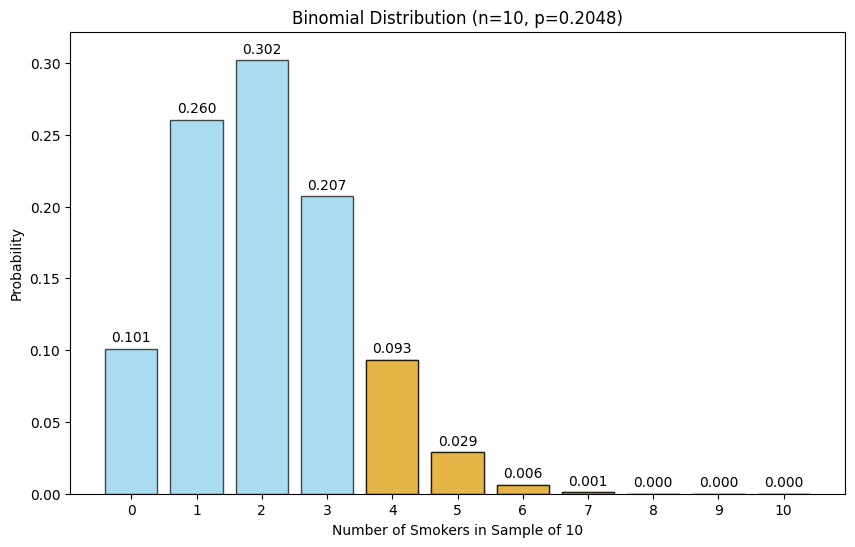

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Load the dataset
csv_file_path = "/content/Insurance_Csv/insurance.csv"  # Adjust path if needed
df = pd.read_csv(csv_file_path)

# Compute probability of a smoker
p_smoker = (df["smoker"] == "yes").mean()

# Sample size
n = 10

# Compute probability of at least 4 smokers
p_at_least_4 = 1 - binom.cdf(3, n, p_smoker)
print(f"Proportion of smokers: {p_smoker:.4f}")
print(f"Probability of at least 4 smokers in a sample of 10: {p_at_least_4:.4f}")

# Binomial distribution plot
x_values = np.arange(0, n + 1)
y_values = binom.pmf(x_values, n, p_smoker)

plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue', edgecolor='black', alpha=0.7)

# Highlight P(X >= 4)
plt.bar(x_values[4:], y_values[4:], color='orange', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Number of Smokers in Sample of 10")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p_smoker:.4f})")
plt.xticks(x_values)
plt.ylim(0, max(y_values) + 0.02)

# Annotate probabilities
for i in range(len(x_values)):
    plt.text(x_values[i], y_values[i] + 0.005, f"{y_values[i]:.3f}", ha='center')

plt.show()


Proportion of individuals with expenses > $20,000: 0.2040
Probability of exactly 5 individuals: 0.1084
Cumulative probability of at most 5 individuals: 0.9336


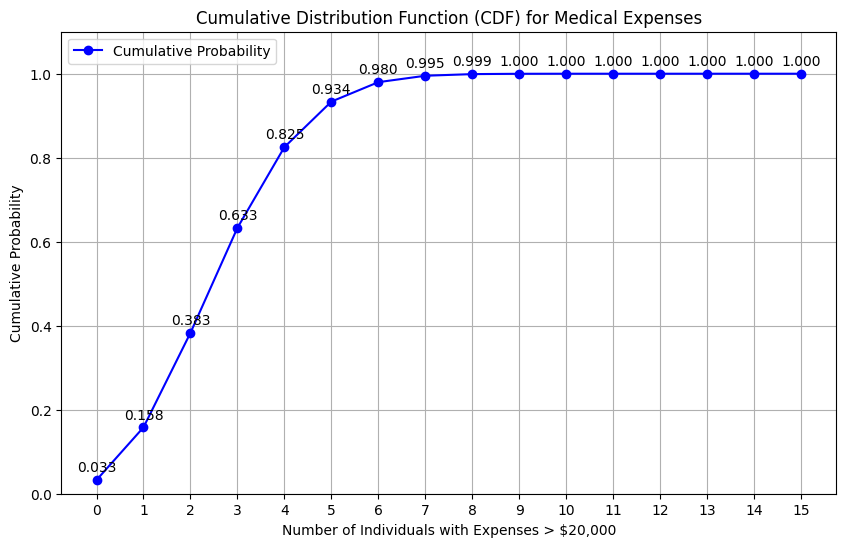

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Load the dataset
csv_file_path = "/content/Insurance_Csv/insurance.csv"  # Adjust path if needed
df = pd.read_csv(csv_file_path)

# Compute probability of medical expenses above $20,000
p_high_expense = (df["expenses"] > 20000).mean()

# Sample size
n = 15

# Compute probability of exactly 5 individuals having expenses > $20,000
p_exactly_5 = binom.pmf(5, n, p_high_expense)

# Compute cumulative probability for at most 5 individuals
p_at_most_5 = binom.cdf(5, n, p_high_expense)

print(f"Proportion of individuals with expenses > $20,000: {p_high_expense:.4f}")
print(f"Probability of exactly 5 individuals: {p_exactly_5:.4f}")
print(f"Cumulative probability of at most 5 individuals: {p_at_most_5:.4f}")

# Generate x values (possible number of individuals with high expenses)
x_values = np.arange(0, n + 1)

# Compute cumulative probabilities
y_cdf = binom.cdf(x_values, n, p_high_expense)

# Plot the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_cdf, marker='o', linestyle='-', color='blue', label="Cumulative Probability")

# Labels and title
plt.xlabel("Number of Individuals with Expenses > $20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) for Medical Expenses")
plt.xticks(x_values)
plt.ylim(0, 1.1)
plt.grid(True)

# Annotate probabilities
for i in range(len(x_values)):
    plt.text(x_values[i], y_cdf[i] + 0.02, f"{y_cdf[i]:.3f}", ha='center')

plt.legend()
plt.show()



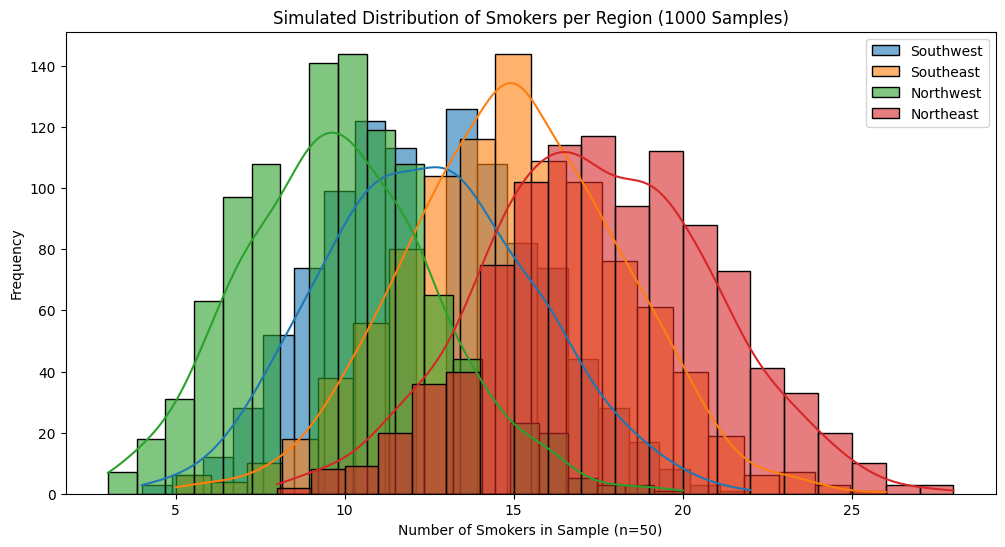

Expected vs Simulated Number of Smokers per Region (n=50):
Southwest: Expected = 12.50, Simulated Mean = 12.46
Southeast: Expected = 15.00, Simulated Mean = 14.99
Northwest: Expected = 10.00, Simulated Mean = 9.82
Northeast: Expected = 17.50, Simulated Mean = 17.41


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define probabilities for each region
regions = {
    "Southwest": 0.25,
    "Southeast": 0.30,
    "Northwest": 0.20,
    "Northeast": 0.35
}

n = 50  # Sample size per region
num_simulations = 1000  # Number of simulations

# (a) Simulate 1000 samples from a binomial distribution for each region
simulated_data = {region: np.random.binomial(n, p, num_simulations) for region, p in regions.items()}

# (b) Visualize the distribution using a bar chart
plt.figure(figsize=(12, 6))
for region, data in simulated_data.items():
    sns.histplot(data, bins=20, kde=True, label=region, alpha=0.6)

plt.xlabel("Number of Smokers in Sample (n=50)")
plt.ylabel("Frequency")
plt.title("Simulated Distribution of Smokers per Region (1000 Samples)")
plt.legend()
plt.show()

# (c) Compute expected number of smokers using E(X) = n * p
expected_values = {region: n * p for region, p in regions.items()}

# Compute the simulated mean for each region
simulated_means = {region: np.mean(data) for region, data in simulated_data.items()}

# Print expected vs simulated values
print("Expected vs Simulated Number of Smokers per Region (n=50):")
for region in regions.keys():
    print(f"{region}: Expected = {expected_values[region]:.2f}, Simulated Mean = {simulated_means[region]:.2f}")


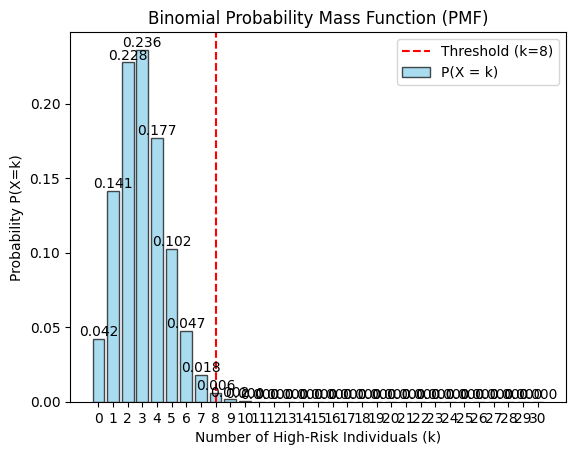

Threshold insurance charge for top 10% high-risk individuals: 5
Probability of selecting exactly 8 high-risk individuals: 0.0058


In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of high medical charges (top 10% classified as high-risk)
p_high_risk = 0.10  # 10% of individuals are high-risk
n = 30  # Sample size
k = 8  # Looking for exactly 8 high-risk individuals

# (a) Find the threshold insurance charge for top 10% using quantile function (qbinom equivalent)
threshold = stats.binom.ppf(0.90, n, p_high_risk)

# (b) Compute probability of selecting exactly 8 high-risk individuals using Binomial PMF (dbinom equivalent)
prob_exactly_8 = stats.binom.pmf(k, n, p_high_risk)

# (c) Plot the Probability Mass Function (PMF)
x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p_high_risk)

plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7, label="P(X = k)")
plt.axvline(k, color='red', linestyle='dashed', label="Threshold (k=8)")
plt.xlabel("Number of High-Risk Individuals (k)")
plt.ylabel("Probability P(X=k)")
plt.title("Binomial Probability Mass Function (PMF)")
plt.xticks(x)

# Label PMF values on bars
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.002, f"{y[i]:.3f}", ha='center', fontsize=10)

plt.legend()
plt.show()

# Print results
print(f"Threshold insurance charge for top 10% high-risk individuals: {threshold:.0f}")
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_exactly_8:.4f}")


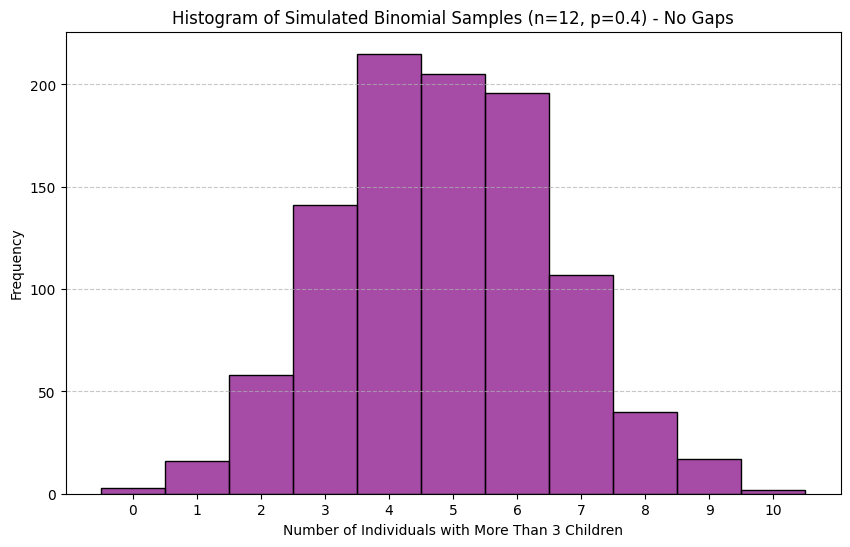

       Probability of at least 5 (pbinom)  Probability of at least 5 (manual)  \
Value                            0.561822                            0.561822   

       Theoretical Mean  Simulated Mean  Theoretical Variance  \
Value               4.8           4.858                  2.88   

       Simulated Variance  
Value            2.917836  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# Given probability
p_more_than_3_children = 0.40

# Sample size
n = 12

# Compute probability of at least 5 individuals having more than 3 children (P(X >= 5))
p_at_least_5 = 1 - binom.cdf(4, n, p_more_than_3_children)

# Manual calculation using the binomial formula for P(X >= 5)
p_manual = sum(binom.pmf(k, n, p_more_than_3_children) for k in range(5, n + 1))

# Simulate 1000 random samples from Binomial distribution
num_simulations = 1000
simulated_samples = binom.rvs(n, p_more_than_3_children, size=num_simulations)

# Compute theoretical mean and variance
theoretical_mean = n * p_more_than_3_children
theoretical_variance = n * p_more_than_3_children * (1 - p_more_than_3_children)

# Compute simulated mean and variance
simulated_mean = simulated_samples.mean()
simulated_variance = simulated_samples.var()

# Define bin edges to remove gaps (center bars properly)
min_value, max_value = simulated_samples.min(), simulated_samples.max()
bins = np.arange(min_value, max_value + 1.5) - 0.5  # Ensures discrete values align with bars

# Plot histogram with adjusted scale (no gaps between bars)
plt.figure(figsize=(10, 6))
sns.histplot(simulated_samples, bins=bins, kde=False, color='purple', alpha=0.7, discrete=True)

# Labels and title
plt.xlabel("Number of Individuals with More Than 3 Children")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Binomial Samples (n=12, p=0.4) - No Gaps")
plt.xticks(np.arange(min_value, max_value + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Keep only horizontal grid lines

plt.show()

# Display comparison results
comparison_results = {
    "Probability of at least 5 (pbinom)": p_at_least_5,
    "Probability of at least 5 (manual)": p_manual,
    "Theoretical Mean": theoretical_mean,
    "Simulated Mean": simulated_mean,
    "Theoretical Variance": theoretical_variance,
    "Simulated Variance": simulated_variance
}

print(pd.DataFrame(comparison_results, index=["Value"]))
